# Визуализация данных

Поговорим о проекте Тинькофф Квест.
Рассматриваем следующий процесс: заявители регистрируются на сайте Тинькофф Квест, где указывают свой возраст. Всех зарегистрированных называем клиентами.

В дальнейшем кто-то из них совершает с созданного аккаунта покупки сертификатов на квест. Будем называть это утилизацией. Число дней от регистрации на сайте до первой покупки будем называть скоростью утилизации.

В приложенном файле таблица со следующими полями:

* client_id -- id клиента, зарегистрированного на сайте
* birth_dt -- дата его рождения
* reg_dttm -- дата и время регистрации на сайте данного клиента
* purchase_id -- id покупки
* purchase_dt -- дата покупки
* purchase_amt -- сумма покупки

Если данные по покупке пустые -- клиент не совершил утилизации.

## Задание 3

Постройте диаграмму (или график), которая показывает, как скорость утилизации влияет на размер первой покупки.
В ответ пришлите изображение диаграммы (или графика) и код (SQL/Python), с помощью которого вы его получили


In [1]:
!wget https://edu.tinkoff.ru/media/edu-files-ext-100/40efea85-f221-4233-b218-87ae35423650.xls

--2021-03-29 12:37:57--  https://edu.tinkoff.ru/media/edu-files-ext-100/40efea85-f221-4233-b218-87ae35423650.xls
Resolving edu.tinkoff.ru (edu.tinkoff.ru)... 178.248.239.60
Connecting to edu.tinkoff.ru (edu.tinkoff.ru)|178.248.239.60|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 120187 (117K) [binary/octet-stream]
Saving to: ‘40efea85-f221-4233-b218-87ae35423650.xls’

40efea85-f221-4233- 100%[===================>] 117.37K   342KB/s    in 0.3s    

2021-03-29 12:37:59 (342 KB/s) - ‘40efea85-f221-4233-b218-87ae35423650.xls’ saved [120187/120187]



In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_excel('/content/40efea85-f221-4233-b218-87ae35423650.xls')
print(df.columns.values)

['client_id' 'birth_dt' 'reg_dttm' 'purchase_id' 'purchase_dt'
 'purchase_amt']


In [77]:
df

,client_id,birth_dt,reg_dttm,purchase_id,purchase_dt,purchase_amt
0,820519,1990-05-10,2019-01-02 12:49:39,NaN,NaT,NaN
1,820521,1970-03-23,2019-01-02 14:14:39,NaN,NaT,NaN
2,820523,1991-04-01,2019-01-02 19:51:19,1.204926e+09,2019-02-12,500.0
3,820526,1985-04-27,2019-01-02 18:09:39,NaN,NaT,NaN
4,820544,1991-05-03,2019-01-03 12:24:42,NaN,NaT,NaN
...,...,...,...,...,...,...
2372,835630,1991-01-05,2019-04-05 11:00:17,NaN,NaT,NaN
2373,835634,1991-09-06,2019-04-05 12:19:05,1.299279e+09,2019-04-07,4000.0
2374,835650,1993-09-02,2019-04-05 12:26:39,1.299387e+09,2019-04-08,1500.0
2375,835666,1998-05-15,2019-04-05 13:16:37,NaN,NaT,NaN


In [78]:
#filter
df = df.loc[(pd.isnull(df.purchase_dt)) == False]
df = df.drop('birth_dt', 1)
df = df.drop('purchase_id', 1)
df['reg_dttm'] = df['reg_dttm'].dt.strftime('%Y-%m-%d')
df['purchase_dt'] = df['purchase_dt'].dt.strftime('%Y-%m-%d')

In [79]:
#i = 0
#df['id_updated'] = [(lambda x: x)(x) for x in range(1239)]
data = df
data = data.reset_index()
data

,index,client_id,reg_dttm,purchase_dt,purchase_amt
0,2,820523,2019-01-02,2019-02-12,500.0
1,6,820561,2019-01-04,2019-02-13,500.0
2,12,820607,2019-01-05,2019-02-21,5000.0
3,13,820607,2019-01-05,2019-03-09,1500.0
4,14,820628,2019-01-06,2019-02-27,500.0
...,...,...,...,...,...
1234,2366,835253,2019-04-03,2019-04-03,500.0
1235,2368,835470,2019-04-04,2019-04-05,3500.0
1236,2371,835526,2019-04-04,2019-04-04,3500.0
1237,2373,835634,2019-04-05,2019-04-07,4000.0


In [121]:
import datetime
 
def get_days(a, b):
  a = a.split('-')
  b = b.split('-')
  aa = datetime.date(int(a[0]),int(a[1]),int(a[2]))
  bb = datetime.date(int(b[0]),int(b[1]),int(b[2]))
  cc = aa-bb
  dd = str(cc)
  if dd.split()[0] == '0:00:00':
    return 0
  else:
    return int(dd.split()[0]) # only days

speed_list = []
cost_list = data['purchase_amt'].to_list()

for i in range(1239):
  temp = get_days(data['purchase_dt'][i], data['reg_dttm'][i])
  speed_list.append(temp)

final_data = pd.DataFrame({'Cost': cost_list, 'Speed': speed_list})
final_data

,Cost,Speed
0,500.0,41
1,500.0,40
2,5000.0,47
3,1500.0,63
4,500.0,52
...,...,...
1234,500.0,0
1235,3500.0,1
1236,3500.0,0
1237,4000.0,2


In [123]:
final_data = final_data.sort_values('Cost', kind='mergesort')
final_data

,Cost,Speed
0,500.0,41
1,500.0,40
4,500.0,52
9,500.0,55
16,500.0,55
...,...,...
1089,6500.0,11
193,7000.0,27
741,7000.0,23
768,7000.0,40


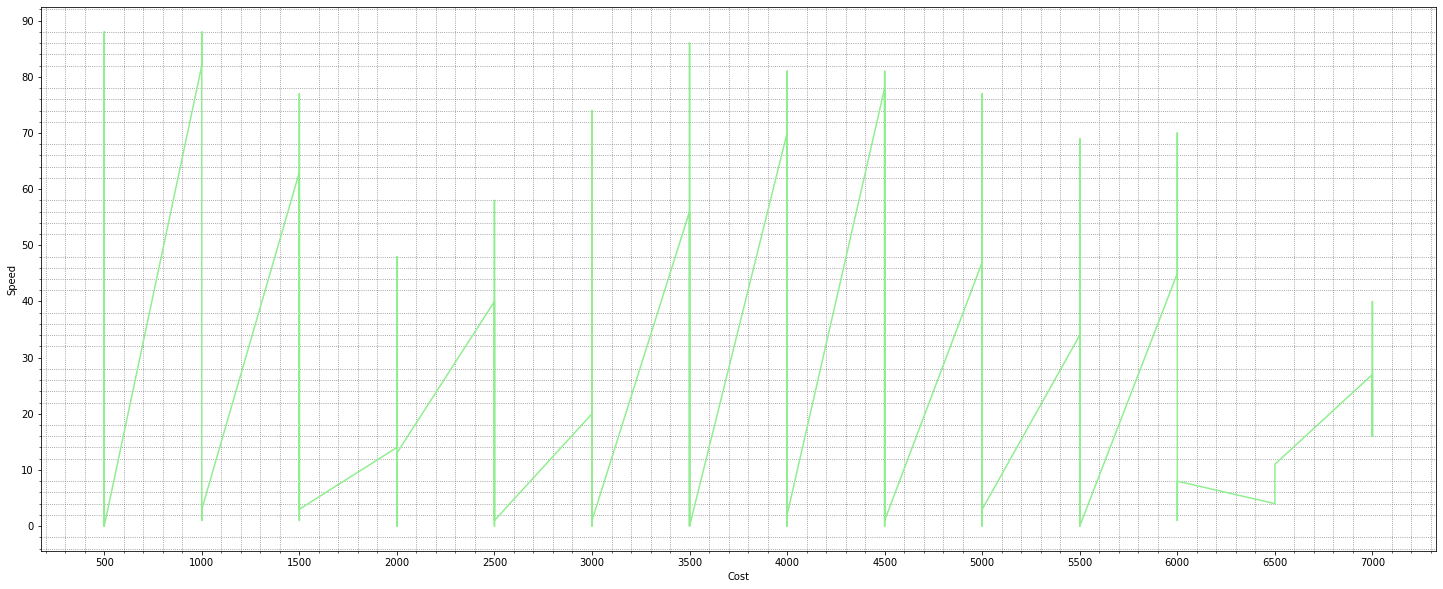

In [139]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

#plt.figure(figsize = (25,10))

fig, ax = plt.subplots(figsize = (25,10))
ax.plot(final_data['Cost'] , final_data['Speed'], color = 'lightgreen')
plt.xlabel('Cost')
plt.ylabel('Speed')

ax.xaxis.set_major_locator(ticker.MultipleLocator(500))
ax.xaxis.set_minor_locator(ticker.MultipleLocator(250))

ax.yaxis.set_major_locator(ticker.MultipleLocator(10))
ax.yaxis.set_minor_locator(ticker.MultipleLocator(5))

plt.minorticks_on()
plt.grid(which='minor',
        color = 'gray',
        linestyle = ':')

plt.savefig('task3.png', dpi = 100)
plt.show()